<h1>Basic Stats on Image Data Set</h1>

Purpose is to understand our data more. Looking at the distribution, mean, median and etc.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

import os
import fnmatch
import matplotlib.pyplot as plt
import numpy as np

from skimage import io

plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [3]:
DATA_PATH = '../data/'
DATA_LFW_PATH = DATA_PATH + 'lfw/'
DATA_LFW_CROPPED_PATH = DATA_PATH + 'lfw_cropped/'

In [4]:
count_by_names_dict = {}
shapes_by_names_dict = {}
for root, dirnames, filenames in os.walk(DATA_LFW_CROPPED_PATH):
    for dirname in dirnames:
        if dirname not in count_by_names_dict:
            count_by_names_dict[dirname] = 0
            shapes_by_names_dict[dirname] = []
        directory_path = os.path.join(DATA_LFW_CROPPED_PATH, dirname)
        for filename in os.listdir(directory_path):
            if filename.endswith(".jpg"):
                count_by_names_dict[dirname] += 1
                shapes_by_names_dict[dirname].append(io.imread(os.path.join(directory_path, filename)).shape)

In [14]:
counts = np.array([x for x in count_by_names_dict.itervalues()])
shapes = np.array([y for x in shapes_by_names_dict.itervalues() for y in x])

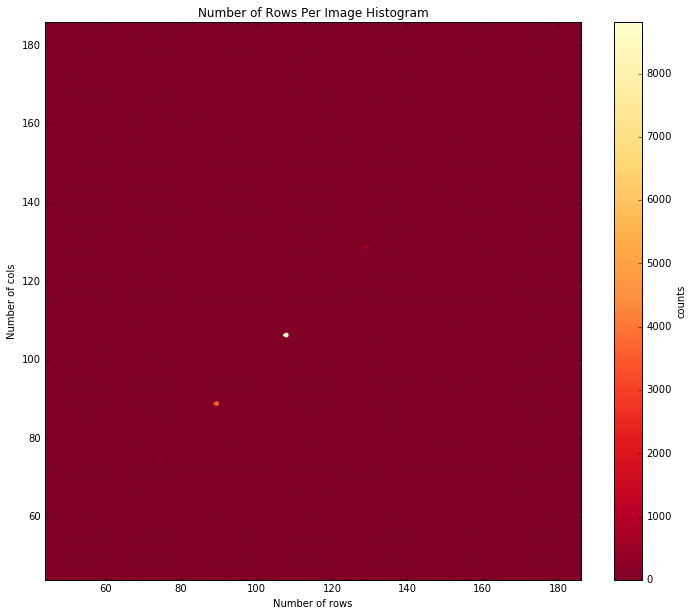

In [19]:
plt.hexbin([shape[0] for shape in shapes], [shape[1] for shape in shapes], cmap=plt.cm.YlOrRd_r)
plt.xlabel('Number of rows')
plt.ylabel('Number of cols')
plt.title('Number of Rows Per Image Histogram')
cb = plt.colorbar()
cb.set_label('counts')
plt.show()

In [6]:
print 'Number of people: {}'.format(len(count_by_names_dict))
print 'Total number of images: {}'.format(np.sum(counts))
print 'Average number of images per person: {}'.format(np.mean(counts))
print 'Median number of images per person: {}'.format(np.median(counts))

Number of people: 5749
Total number of images: 13172
Average number of images per person: 2.29118107497
Median number of images per person: 1.0


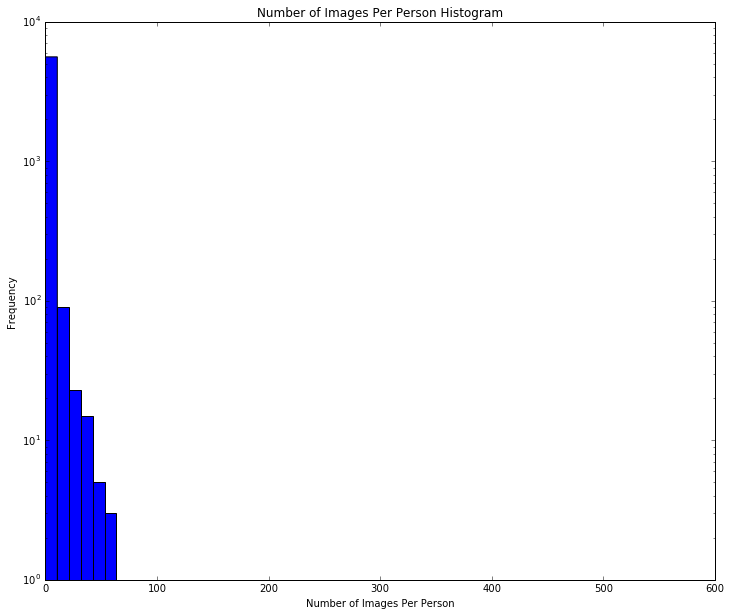

In [7]:
plt.hist(counts, 50)
plt.xlabel('Number of Images Per Person')
plt.yscale('log')
plt.ylabel('Frequency')
plt.title('Number of Images Per Person Histogram')
plt.show()

In [8]:
print 'Top people by image count:'
sorted(count_by_names_dict.items(), key=lambda x: x[1], reverse=True)[:15]

Top people by image count:


[('George_W_Bush', 529),
 ('Colin_Powell', 236),
 ('Tony_Blair', 144),
 ('Donald_Rumsfeld', 120),
 ('Gerhard_Schroeder', 109),
 ('Ariel_Sharon', 77),
 ('Hugo_Chavez', 71),
 ('Junichiro_Koizumi', 60),
 ('Jean_Chretien', 55),
 ('John_Ashcroft', 53),
 ('Serena_Williams', 52),
 ('Jacques_Chirac', 50),
 ('Vladimir_Putin', 49),
 ('Luiz_Inacio_Lula_da_Silva', 48),
 ('Gloria_Macapagal_Arroyo', 44)]

In [9]:
for i in range(1, 10):
    print ('Number of people with ' + str(i) + ' images or more: ' 
    + str(len([x for x in count_by_names_dict.items() if x[1] >= i])))

Number of people with 1 images or more: 5721
Number of people with 2 images or more: 1671
Number of people with 3 images or more: 896
Number of people with 4 images or more: 606
Number of people with 5 images or more: 421
Number of people with 6 images or more: 310
Number of people with 7 images or more: 255
Number of people with 8 images or more: 217
Number of people with 9 images or more: 184
